Central Business District    3777
South Side Flats             3184
Carrick                      2198
East Allegheny               2006
Homewood South               1939
                             ... 
Ridgemont                      35
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

0                       Bloomfield
1                     Outside City
2                         Westwood
3                   East Allegheny
4                  Crafton Heights
                   ...            
61164             South Side Flats
61165               Homewood North
61166                 Point Breeze
61167    Central Business District
61168          Lower Lawrenceville
Name: INCIDENTNEIGHBORHOOD, Length: 61169, dtype: object


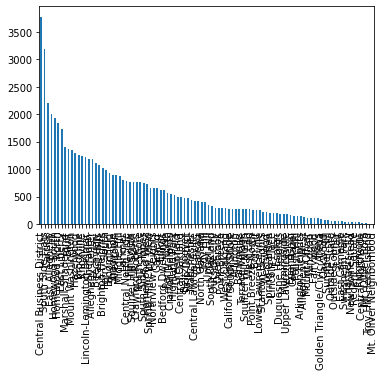

In [2]:
import pandas as pd

data = pd.read_csv('arrestdata.csv')

#data.head()

neighborhoods = data['INCIDENTNEIGHBORHOOD'].value_counts() #count up the number of arrests per neighborhood
neighborhoods.sort_values(ascending=False)
display(neighborhoods)
neighborhoods.plot.bar() #plot the arrests in a bar graph

neighborhood_string = data['INCIDENTNEIGHBORHOOD'].astype(str)
print(neighborhood_string)


In [3]:
neighborhood_dictionary = {}
for index, row in data.iterrows(): #iterate through each row in the file
    if row['INCIDENTNEIGHBORHOOD'] not in neighborhood_dictionary.keys(): #add neighborhood to dictionary
        neighborhood_dictionary[row['INCIDENTNEIGHBORHOOD']] = 1 
    else: #add to the dictionary value
        neighborhood_dictionary[row['INCIDENTNEIGHBORHOOD']] = neighborhood_dictionary[row['INCIDENTNEIGHBORHOOD']] + 1 
        
        
arrests_byHood = pd.DataFrame()
arrests_byHood["Neighborhood"] = list(neighborhood_dictionary.keys()) #create a list with the key number and num of arrests
arrests_byHood["Arrests"] = list(neighborhood_dictionary.values())
arrests_byHood.sort_values(by=["Arrests"], ascending = False) #sort by num of arrests per neighborhood

,Neighborhood,Arrests
87,Central Business District,3777
13,South Side Flats,3184
9,NaN,2324
11,Carrick,2198
3,East Allegheny,2006
...,...,...
94,Ridgemont,35
26,Central Northside,23
98,Mt. Oliver Boro,18
27,Troy Hill-Herrs Island,6


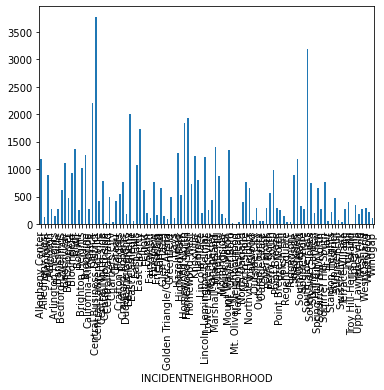

In [10]:
counts_neighborhoods = data.groupby(['INCIDENTNEIGHBORHOOD'])['INCIDENTNEIGHBORHOOD'].count()
counts_neighborhoods.plot(kind = "bar") #plot neighborhoods in a bar graph alphabetically

In [13]:
counts_neighborhoods.head() #alphabetically sorted neighborhood list

INCIDENTNEIGHBORHOOD
Allegheny Center     1180
Allegheny West        122
Allentown             884
Arlington             275
Arlington Heights     138
Name: INCIDENTNEIGHBORHOOD, dtype: int64

,hood,Arrests,geometry
0,Central Oakland,485.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,408.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,283.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,768.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,470.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


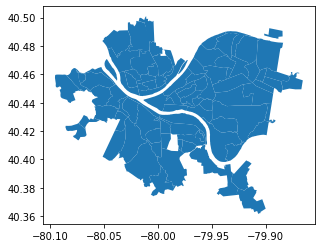

In [56]:
import geopandas

neighborhood_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhood_map.plot()

arrests_map = neighborhood_map.merge(arrests_byHood, how = 'left', left_on = 'hood', right_on = "Neighborhood")
arrests_map[['hood', 'Arrests', 'geometry']].head() #create a map of the neighborhoods of Pittsburgh

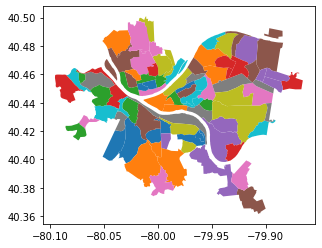

In [57]:
arrests_map.plot(column = 'Neighborhood') #color code each neighborhood

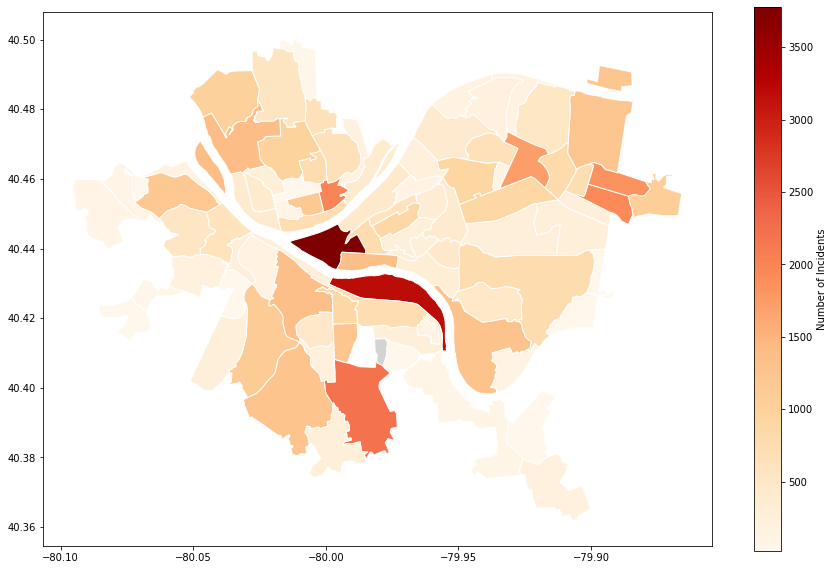

In [60]:
arrests_map.plot(column='Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )